# Daily Revenue Analysis with Weekly Averages

This notebook analyzes daily revenue data and displays it with weekly average points.


In [169]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [170]:
# Load the daily revenue data
with open('universe_6931042565/daily_revenue_20250921_011820.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data['kpiData'])

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Convert Robux to USD (1 Robux = $0.0038)
ROBUX_TO_USD = 0.0038
df['Estimated Revenue USD'] = df['Estimated Revenue'] * ROBUX_TO_USD

# Display basic info about the data
print(f"Data shape: {df.shape}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Revenue range (Robux): {df['Estimated Revenue'].min():,.0f} to {df['Estimated Revenue'].max():,.0f}")
print(f"Revenue range (USD): ${df['Estimated Revenue USD'].min():,.2f} to ${df['Estimated Revenue USD'].max():,.2f}")

df.head()


Data shape: (244, 6)
Date range: 2025-01-21 00:00:00+00:00 to 2025-09-21 00:00:00+00:00
Revenue range (Robux): 233,268 to 25,612,037
Revenue range (USD): $886.42 to $97,325.74


,date,Estimated Revenue,Predicted Revenue,Predicted Revenue Max,Predicted Revenue Min,Estimated Revenue USD
0,2025-01-21 00:00:00+00:00,233268.0,NaN,NaN,NaN,886.4184
1,2025-01-22 00:00:00+00:00,1727826.0,NaN,NaN,NaN,6565.7388
2,2025-01-23 00:00:00+00:00,2037884.0,NaN,NaN,NaN,7743.9592
3,2025-01-24 00:00:00+00:00,2688635.0,NaN,NaN,NaN,10216.8130
4,2025-01-25 00:00:00+00:00,3291794.0,NaN,NaN,NaN,12508.8172


In [171]:
# Calculate weekly averages
# Create a week column (starting from Monday)
df['week'] = df['date'].dt.to_period('W-MON')

# Calculate weekly averages for both Robux and USD
weekly_avg = df.groupby('week').agg({
    'Estimated Revenue': 'mean',
    'Estimated Revenue USD': 'mean'
}).reset_index()
weekly_avg['week_start'] = weekly_avg['week'].dt.start_time

print(f"Number of weeks: {len(weekly_avg)}")
print(f"Weekly average range (USD): ${weekly_avg['Estimated Revenue USD'].min():,.2f} to ${weekly_avg['Estimated Revenue USD'].max():,.2f}")
weekly_avg.head()


Number of weeks: 35
Weekly average range (USD): $9,273.06 to $68,375.26


/var/folders/2c/p9xpkn711kx3pz68qqm4rbzh0000gn/T/ipykernel_99889/3953797576.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df['date'].dt.to_period('W-MON')


,week,Estimated Revenue,Estimated Revenue USD,week_start
0,2025-01-21/2025-01-27,2.440278e+06,9273.058029,2025-01-21
1,2025-01-28/2025-02-03,3.825636e+06,14537.415171,2025-01-28
2,2025-02-04/2025-02-10,3.297794e+06,12531.617743,2025-02-04
3,2025-02-11/2025-02-17,4.790355e+06,18203.348457,2025-02-11
4,2025-02-18/2025-02-24,4.427467e+06,16824.374057,2025-02-18


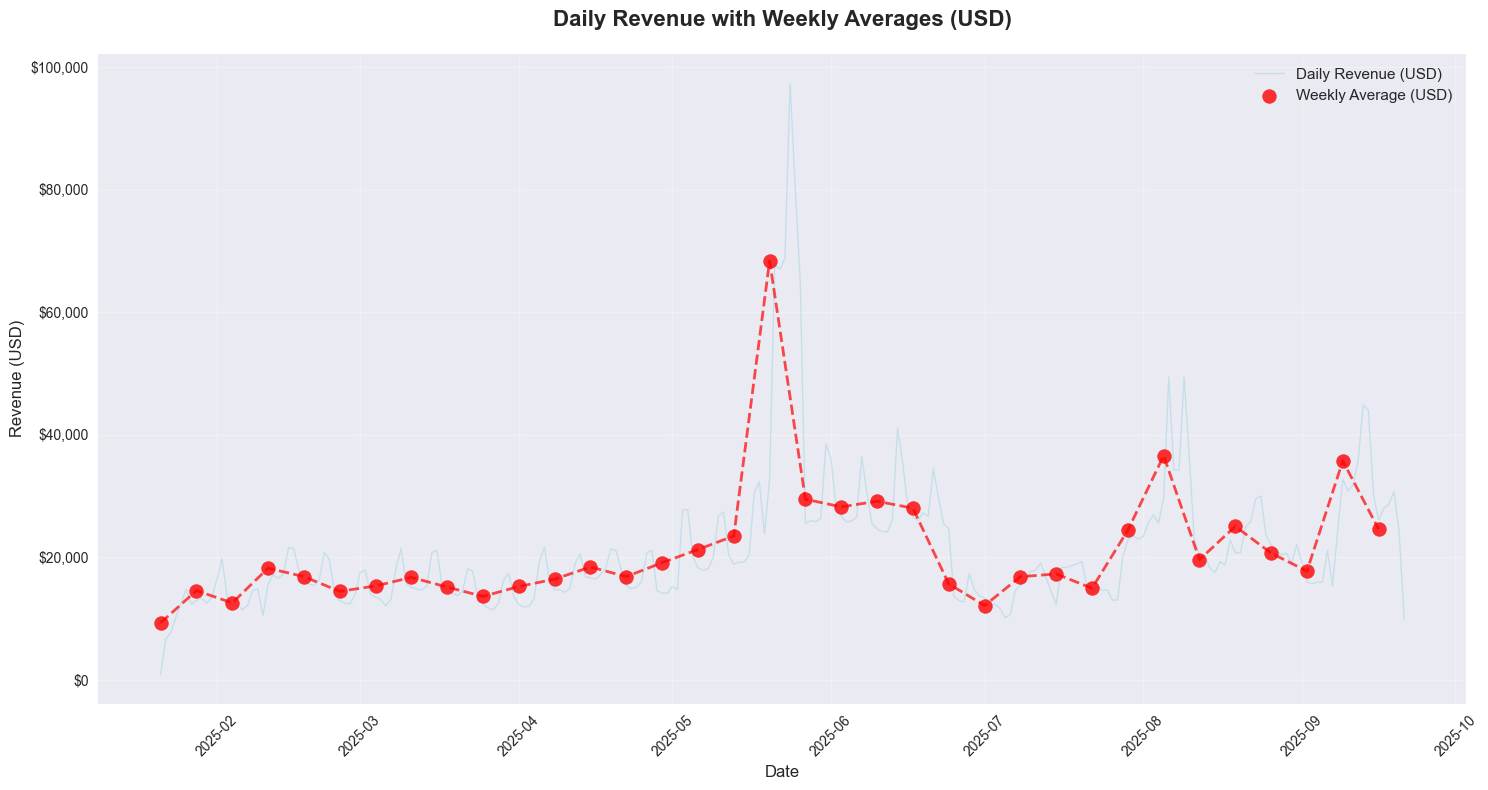

In [172]:
# Create the main visualization
plt.figure(figsize=(15, 8))

# Plot daily revenue as a line (in USD)
plt.plot(df['date'], df['Estimated Revenue USD'], 
         alpha=0.6, linewidth=1, color='lightblue', 
         label='Daily Revenue (USD)')

# Plot weekly averages as points (in USD)
plt.scatter(weekly_avg['week_start'], weekly_avg['Estimated Revenue USD'], 
           s=100, color='red', alpha=0.8, 
           label='Weekly Average (USD)', zorder=5)

# Add connecting lines for weekly averages
plt.plot(weekly_avg['week_start'], weekly_avg['Estimated Revenue USD'], 
         color='red', alpha=0.7, linewidth=2, 
         linestyle='--', zorder=4)

# Customize the plot
plt.title('Daily Revenue with Weekly Averages (USD)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Format y-axis to show currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()


<Figure size 1600x1000 with 0 Axes>

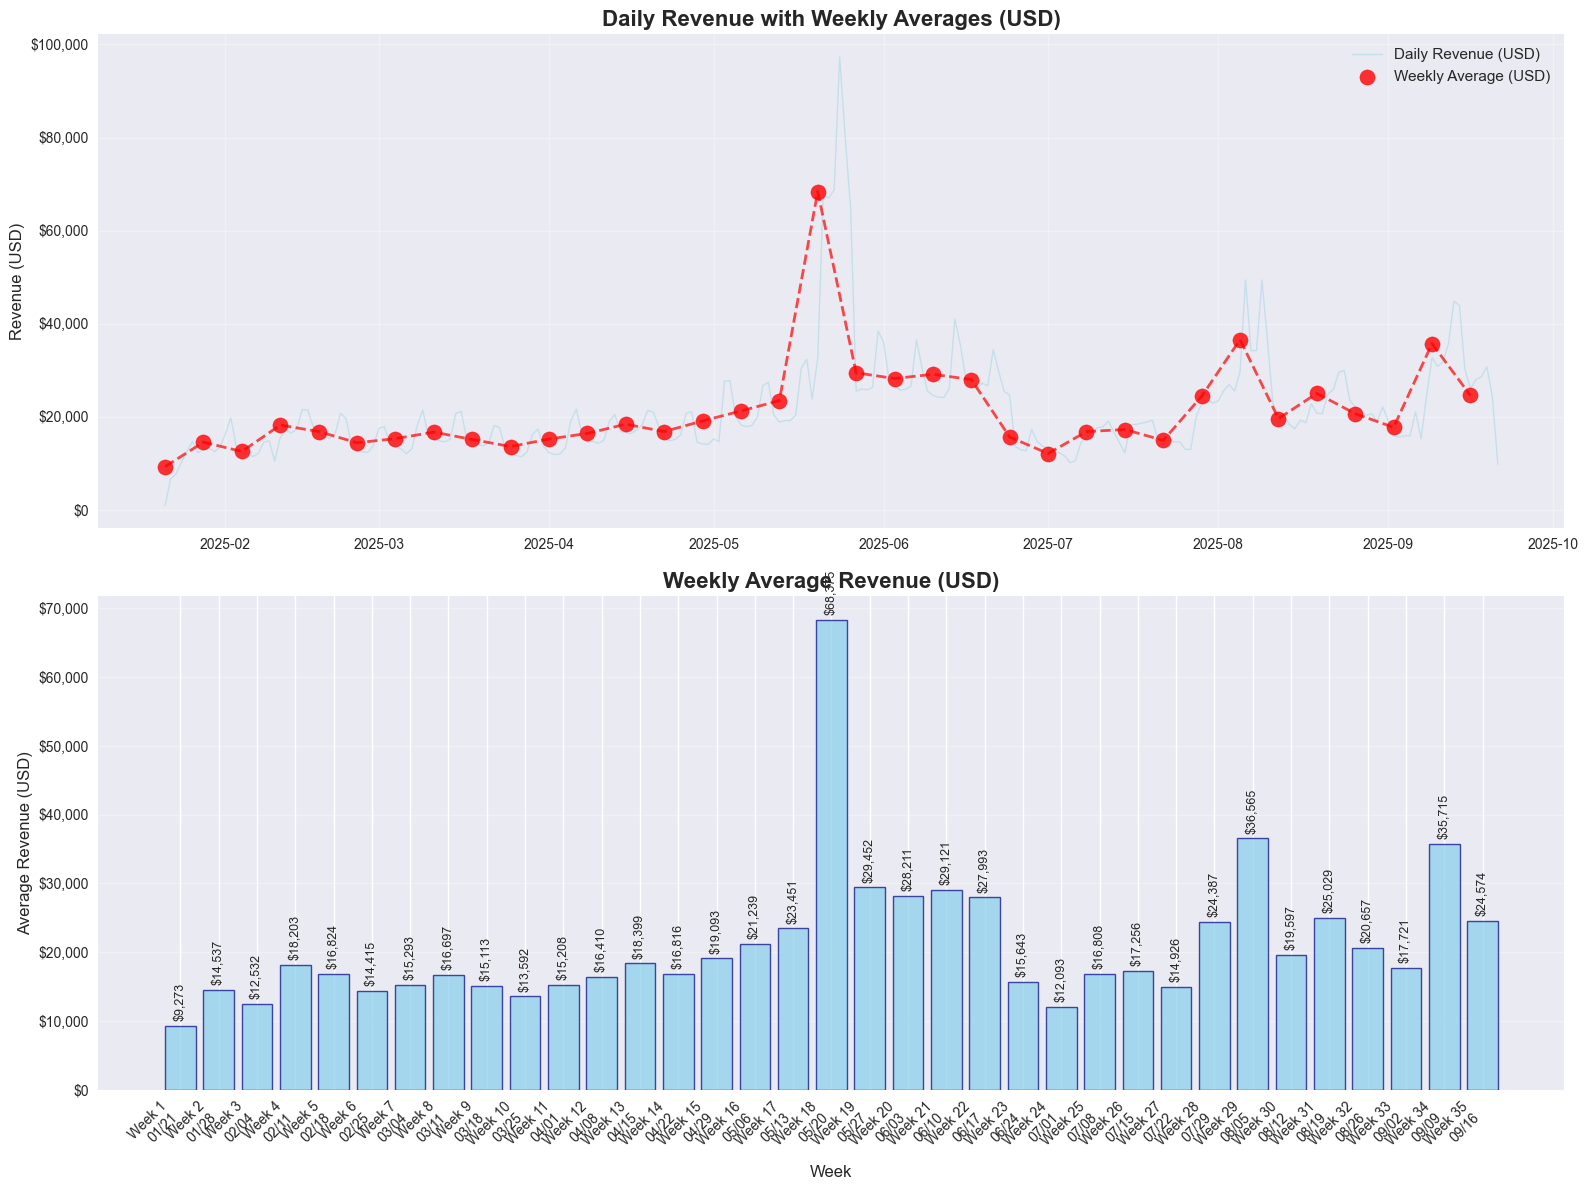

In [173]:
# Create a detailed analysis with statistics
plt.figure(figsize=(16, 10))

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Top plot: Daily revenue with weekly averages (in USD)
ax1.plot(df['date'], df['Estimated Revenue USD'], 
         alpha=0.6, linewidth=1, color='lightblue', 
         label='Daily Revenue (USD)')
ax1.scatter(weekly_avg['week_start'], weekly_avg['Estimated Revenue USD'], 
           s=120, color='red', alpha=0.8, 
           label='Weekly Average (USD)', zorder=5)
ax1.plot(weekly_avg['week_start'], weekly_avg['Estimated Revenue USD'], 
         color='red', alpha=0.7, linewidth=2, 
         linestyle='--', zorder=4)

ax1.set_title('Daily Revenue with Weekly Averages (USD)', fontsize=16, fontweight='bold')
ax1.set_ylabel('Revenue (USD)', fontsize=12)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Bottom plot: Weekly averages bar chart (in USD)
bars = ax2.bar(range(len(weekly_avg)), weekly_avg['Estimated Revenue USD'], 
               color='skyblue', alpha=0.7, edgecolor='navy', linewidth=1)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, weekly_avg['Estimated Revenue USD'])):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(weekly_avg['Estimated Revenue USD'])*0.01,
             f'${value:,.0f}', ha='center', va='bottom', fontsize=9, rotation=90)

ax2.set_title('Weekly Average Revenue (USD)', fontsize=16, fontweight='bold')
ax2.set_xlabel('Week', fontsize=12)
ax2.set_ylabel('Average Revenue (USD)', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Set x-axis labels for weeks
week_labels = [f"Week {i+1}\n{week.strftime('%m/%d')}" for i, week in enumerate(weekly_avg['week_start'])]
ax2.set_xticks(range(len(weekly_avg)))
ax2.set_xticklabels(week_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [174]:
# Display summary statistics
print("=== REVENUE ANALYSIS SUMMARY ===")
print(f"\nTotal Days: {len(df)}")
print(f"Total Weeks: {len(weekly_avg)}")
print(f"Conversion Rate: 1 Robux = ${ROBUX_TO_USD:.4f}")

print(f"\nDaily Revenue Statistics (Robux):")
print(f"  Average: {df['Estimated Revenue'].mean():,.0f} Robux")
print(f"  Median: {df['Estimated Revenue'].median():,.0f} Robux")
print(f"  Min: {df['Estimated Revenue'].min():,.0f} Robux")
print(f"  Max: {df['Estimated Revenue'].max():,.0f} Robux")
print(f"  Std Dev: {df['Estimated Revenue'].std():,.0f} Robux")

print(f"\nDaily Revenue Statistics (USD):")
print(f"  Average: ${df['Estimated Revenue USD'].mean():,.2f}")
print(f"  Median: ${df['Estimated Revenue USD'].median():,.2f}")
print(f"  Min: ${df['Estimated Revenue USD'].min():,.2f}")
print(f"  Max: ${df['Estimated Revenue USD'].max():,.2f}")
print(f"  Std Dev: ${df['Estimated Revenue USD'].std():,.2f}")

print(f"\nWeekly Average Statistics (USD):")
print(f"  Average: ${weekly_avg['Estimated Revenue USD'].mean():,.2f}")
print(f"  Median: ${weekly_avg['Estimated Revenue USD'].median():,.2f}")
print(f"  Min: ${weekly_avg['Estimated Revenue USD'].min():,.2f}")
print(f"  Max: ${weekly_avg['Estimated Revenue USD'].max():,.2f}")
print(f"  Std Dev: ${weekly_avg['Estimated Revenue USD'].std():,.2f}")

# Find best and worst weeks
best_week = weekly_avg.loc[weekly_avg['Estimated Revenue USD'].idxmax()]
worst_week = weekly_avg.loc[weekly_avg['Estimated Revenue USD'].idxmin()]

print(f"\nBest Week: {best_week['week_start'].strftime('%Y-%m-%d')} with ${best_week['Estimated Revenue USD']:,.2f}")
print(f"Worst Week: {worst_week['week_start'].strftime('%Y-%m-%d')} with ${worst_week['Estimated Revenue USD']:,.2f}")

# Calculate total revenue
total_robux = df['Estimated Revenue'].sum()
total_usd = df['Estimated Revenue USD'].sum()
print(f"\nTotal Revenue: {total_robux:,.0f} Robux (${total_usd:,.2f} USD)")


=== REVENUE ANALYSIS SUMMARY ===

Total Days: 244
Total Weeks: 35
Conversion Rate: 1 Robux = $0.0038

Daily Revenue Statistics (Robux):
  Average: 5,569,427 Robux
  Median: 4,806,141 Robux
  Min: 233,268 Robux
  Max: 25,612,037 Robux
  Std Dev: 3,000,381 Robux

Daily Revenue Statistics (USD):
  Average: $21,163.82
  Median: $18,263.34
  Min: $886.42
  Max: $97,325.74
  Std Dev: $11,401.45

Weekly Average Statistics (USD):
  Average: $21,177.74
  Median: $17,721.21
  Min: $9,273.06
  Max: $68,375.26
  Std Dev: $10,458.68

Best Week: 2025-05-20 with $68,375.26
Worst Week: 2025-01-21 with $9,273.06

Total Revenue: 1,358,940,254 Robux ($5,163,972.97 USD)


In [175]:
# NEW APPROACH: Weekly projection with controlled spikes for May/December only
# Find the historical peak to cap the spikes (from weekly data)
historical_peak_weekly = weekly_avg['Estimated Revenue USD'].max()
print(f"Historical weekly peak: ${historical_peak_weekly:,.2f}")

# Calculate May's scaling factor from weekly averages (not daily)
may_weeks = weekly_avg[weekly_avg['week_start'].dt.month == may_month]
if len(may_weeks) > 0:
    may_weekly_avg = may_weeks['Estimated Revenue USD'].mean()
    may_scale_weekly = may_weekly_avg / lifetime_mean
    may_weekly_deviations = may_weeks['Estimated Revenue USD'] / lifetime_mean
    may_deviation_pattern = may_weekly_deviations.tolist()
    print(f"May weekly average: ${may_weekly_avg:,.2f}")
    print(f"May weekly scaling factor: {may_scale_weekly:.3f}x")
    print(f"May weekly deviation pattern: {[f'{x:.3f}x' for x in may_deviation_pattern]}")
else:
    may_scale_weekly = 1.0
    may_deviation_pattern = [1.0]  # Default if no May data
    print("No May data found, using default pattern")

# Update the scaling factors to use weekly-based calculations
may_scale = may_scale_weekly  # Use weekly-based May scaling
december_scale = may_scale_weekly  # Use May's weekly scaling for December

print(f"Updated scaling factors (weekly-based):")
print(f"  May: {may_scale:.3f}x")
print(f"  December: {december_scale:.3f}x")

# For non-May/December months, use small deviations around average
normal_week_deviations = [0.9, 1.0, 1.1, 0.95, 1.05]  # Small variations around average
print(f"Normal week deviation pattern: {[f'{x:.2f}x' for x in normal_week_deviations]}")

# Generate 18-month weekly projection with deviation patterns
def generate_weekly_projection_with_deviations(start_date, months=18):
    """
    Generate weekly projection using average as base and applying weekly deviation patterns
    Extends exactly 18 months from start_date
    """
    projection_weekly_dates = []
    projection_weekly_revenues = []
    
    current_date = start_date
    end_date = start_date + timedelta(days=18 * 30)  # Approximate 18 months
    
    # Generate weekly data for exactly 18 months
    while current_date < end_date:
        month = current_date.month
        
        # Determine base scaling factor for the month
        if month in summer_months:
            month_scale = summer_scale
        elif month == december_month:
            month_scale = may_scale  # Use May's scale for December
        elif month == may_month:
            month_scale = may_scale
        else:
            month_scale = 1.0
        
        # Get weeks in this month
        if month == 12:
            next_month = current_date.replace(year=current_date.year + 1, month=1)
        else:
            next_month = current_date.replace(month=current_date.month + 1)
        
        # Don't go beyond 18 months
        if next_month > end_date:
            next_month = end_date
        
        # Generate weekly data for this month
        weeks_in_month = []
        temp_date = current_date
        
        while temp_date < next_month:
            # Find Monday of the week
            days_since_monday = temp_date.weekday()
            week_start = temp_date - timedelta(days=days_since_monday)
            
            if week_start not in weeks_in_month and week_start < end_date:
                weeks_in_month.append(week_start)
            
            temp_date += timedelta(days=7)
        
        # Apply weekly deviation pattern based on month type
        for week_idx, week_start in enumerate(weeks_in_month):
            if month == may_month or month == december_month:
                # Use May's deviation pattern for May and December (spike months)
                deviation_idx = week_idx % len(may_deviation_pattern)
                weekly_deviation = may_deviation_pattern[deviation_idx]
            else:
                # Use small deviations for other months (close to average)
                deviation_idx = week_idx % len(normal_week_deviations)
                weekly_deviation = normal_week_deviations[deviation_idx]
            
            # Calculate weekly revenue: base * month_scale * weekly_deviation
            weekly_revenue = lifetime_mean * month_scale * weekly_deviation
            
            # Cap the revenue to not exceed historical weekly peak
            weekly_revenue = min(weekly_revenue, historical_peak_weekly)
            
            projection_weekly_dates.append(week_start)
            projection_weekly_revenues.append(weekly_revenue)
        
        # Move to next month
        current_date = next_month
    
    return projection_weekly_dates, projection_weekly_revenues

# Generate the new weekly projection - exactly 18 months from historical end
start_date = df['date'].max() + timedelta(days=1)
new_projection_dates, new_projection_revenues = generate_weekly_projection_with_deviations(start_date)

# Convert to DataFrame
new_projection_df = pd.DataFrame({
    'date': new_projection_dates,
    'Estimated Revenue USD': new_projection_revenues
})

# Calculate the actual end date (18 months from start)
actual_end_date = start_date + timedelta(days=18 * 30)  # 18 months approximately

print(f"Generated {len(new_projection_df)} weekly projections")
print(f"Projection period: {new_projection_dates[0].strftime('%Y-%m-%d')} to {new_projection_dates[-1].strftime('%Y-%m-%d')}")
print(f"Projection duration: ~18 months from historical end")
print(f"Average weekly revenue: ${np.mean(new_projection_revenues):,.2f}")
print(f"Weekly revenue range: ${np.min(new_projection_revenues):,.2f} to ${np.max(new_projection_revenues):,.2f}")

# Calculate monthly aggregates from weekly data
new_projection_df['month'] = new_projection_df['date'].dt.to_period('M')
monthly_aggregates = new_projection_df.groupby('month')['Estimated Revenue USD'].sum().reset_index()
monthly_aggregates['month_start'] = monthly_aggregates['month'].dt.start_time

print(f"Monthly aggregates: {len(monthly_aggregates)} months")
print(f"Average monthly revenue: ${monthly_aggregates['Estimated Revenue USD'].mean():,.2f}")

# Verify we have exactly 18 months of data
projection_months = len(monthly_aggregates)
print(f"Projection covers {projection_months} months (target: 18)")


Historical weekly peak: $68,375.26
May weekly average: $35,629.45
May weekly scaling factor: 1.684x
May weekly deviation pattern: ['1.004x', '1.108x', '3.231x', '1.392x']
Updated scaling factors (weekly-based):
  May: 1.684x
  December: 1.684x
Normal week deviation pattern: ['0.90x', '1.00x', '1.10x', '0.95x', '1.05x']
Generated 88 weekly projections
Projection period: 2025-09-22 to 2027-03-15
Projection duration: ~18 months from historical end
Average weekly revenue: $25,552.08
Weekly revenue range: $19,047.44 to $68,375.26
Monthly aggregates: 19 months
Average monthly revenue: $118,346.49
Projection covers 19 months (target: 18)


/var/folders/2c/p9xpkn711kx3pz68qqm4rbzh0000gn/T/ipykernel_99889/382924810.py:128: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  new_projection_df['month'] = new_projection_df['date'].dt.to_period('M')


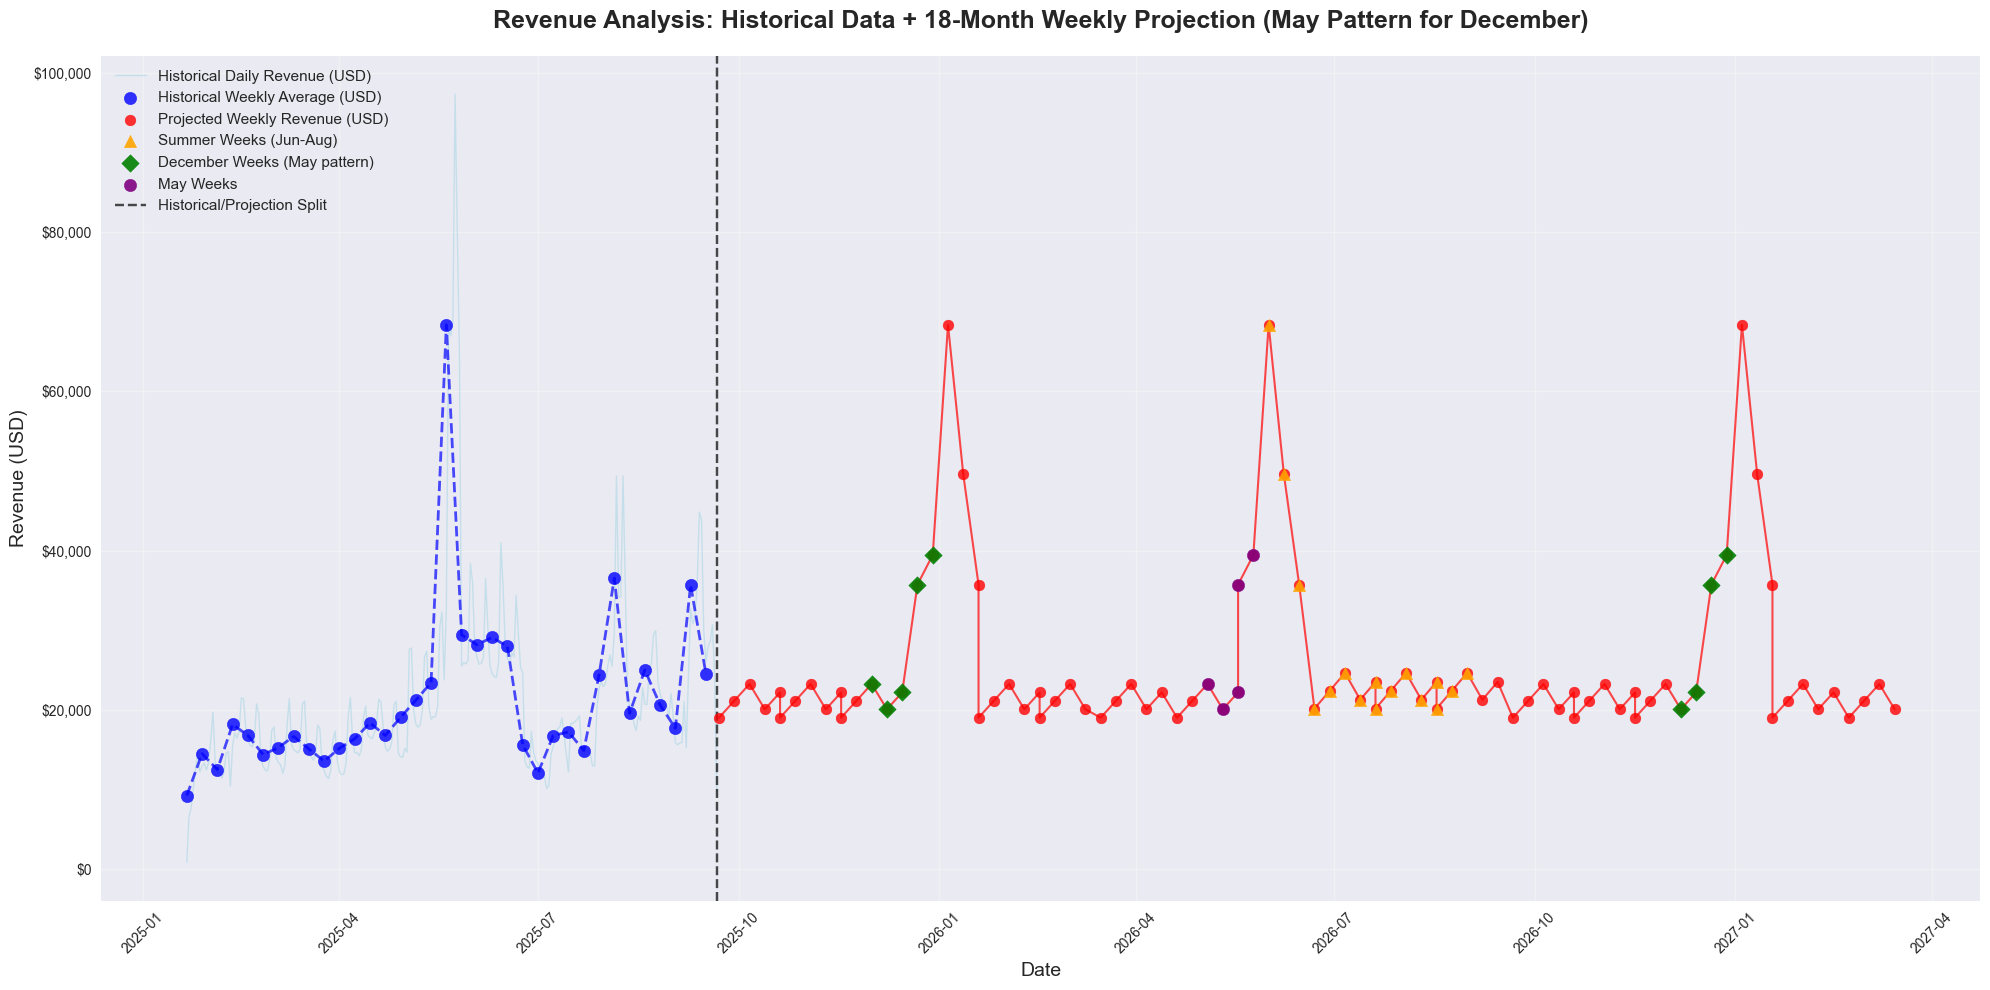

In [176]:
# Create the new 18-month projection graph with weekly deviation patterns
plt.figure(figsize=(20, 10))

# Plot historical daily revenue
plt.plot(df['date'], df['Estimated Revenue USD'], 
         alpha=0.6, linewidth=1, color='lightblue', 
         label='Historical Daily Revenue (USD)')

# Plot historical weekly averages
plt.scatter(weekly_avg['week_start'], weekly_avg['Estimated Revenue USD'], 
           s=80, color='blue', alpha=0.8, 
           label='Historical Weekly Average (USD)', zorder=5)

# Plot historical weekly average line
plt.plot(weekly_avg['week_start'], weekly_avg['Estimated Revenue USD'], 
         color='blue', alpha=0.7, linewidth=2, 
         linestyle='--', zorder=4)

# Plot new weekly projection points
plt.scatter(new_projection_df['date'], new_projection_df['Estimated Revenue USD'], 
           s=60, color='red', alpha=0.8, 
           label='Projected Weekly Revenue (USD)', zorder=5)

# Plot new weekly projection line
plt.plot(new_projection_df['date'], new_projection_df['Estimated Revenue USD'], 
         color='red', alpha=0.7, linewidth=1.5, 
         linestyle='-', zorder=4)



# Highlight special months
summer_proj_weeks = new_projection_df[new_projection_df['date'].dt.month.isin(summer_months)]
december_proj_weeks = new_projection_df[new_projection_df['date'].dt.month == december_month]
may_proj_weeks = new_projection_df[new_projection_df['date'].dt.month == may_month]

if len(summer_proj_weeks) > 0:
    plt.scatter(summer_proj_weeks['date'], summer_proj_weeks['Estimated Revenue USD'], 
               s=80, color='orange', alpha=0.9, zorder=6,
               label='Summer Weeks (Jun-Aug)', marker='^')

if len(december_proj_weeks) > 0:
    plt.scatter(december_proj_weeks['date'], december_proj_weeks['Estimated Revenue USD'], 
               s=80, color='green', alpha=0.9, zorder=6,
               label='December Weeks (May pattern)', marker='D')

if len(may_proj_weeks) > 0:
    plt.scatter(may_proj_weeks['date'], may_proj_weeks['Estimated Revenue USD'], 
               s=80, color='purple', alpha=0.9, zorder=6,
               label='May Weeks', marker='o')

# Add vertical line to separate historical from projection
split_date = df['date'].max()
plt.axvline(x=split_date, color='black', linestyle='--', alpha=0.7, 
           label='Historical/Projection Split')

# Customize the plot
plt.title('Revenue Analysis: Historical Data + 18-Month Weekly Projection (May Pattern for December)', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Revenue (USD)', fontsize=14)
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)

# Format y-axis to show currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


In [177]:
# Analysis of the new projection approach
print("=== CONTROLLED SPIKE PROJECTION ANALYSIS ===")

# Analyze December spike simulation
december_weeks = new_projection_df[new_projection_df['date'].dt.month == december_month]
may_weeks_proj = new_projection_df[new_projection_df['date'].dt.month == may_month]

print(f"\nDecember Spike Simulation (using May's pattern, capped at peak):")
if len(december_weeks) > 0:
    print(f"  December weeks: {len(december_weeks)}")
    print(f"  December average: ${december_weeks['Estimated Revenue USD'].mean():,.2f}")
    print(f"  December range: ${december_weeks['Estimated Revenue USD'].min():,.2f} - ${december_weeks['Estimated Revenue USD'].max():,.2f}")
    print(f"  December vs base: {december_weeks['Estimated Revenue USD'].mean() / lifetime_mean:.3f}x")
    print(f"  December vs historical weekly peak: {december_weeks['Estimated Revenue USD'].max() / historical_peak_weekly:.3f}x")

print(f"\nMay Weeks (original pattern, capped at weekly peak):")
if len(may_weeks_proj) > 0:
    print(f"  May weeks: {len(may_weeks_proj)}")
    print(f"  May average: ${may_weeks_proj['Estimated Revenue USD'].mean():,.2f}")
    print(f"  May range: ${may_weeks_proj['Estimated Revenue USD'].min():,.2f} - ${may_weeks_proj['Estimated Revenue USD'].max():,.2f}")
    print(f"  May vs base: {may_weeks_proj['Estimated Revenue USD'].mean() / lifetime_mean:.3f}x")
    print(f"  May vs historical weekly peak: {may_weeks_proj['Estimated Revenue USD'].max() / historical_peak_weekly:.3f}x")

# Analyze summer weeks (should be close to average)
summer_weeks = new_projection_df[new_projection_df['date'].dt.month.isin(summer_months)]
print(f"\nSummer Weeks (Jun-Aug - close to average):")
if len(summer_weeks) > 0:
    print(f"  Summer weeks: {len(summer_weeks)}")
    print(f"  Summer average: ${summer_weeks['Estimated Revenue USD'].mean():,.2f}")
    print(f"  Summer range: ${summer_weeks['Estimated Revenue USD'].min():,.2f} - ${summer_weeks['Estimated Revenue USD'].max():,.2f}")
    print(f"  Summer vs base: {summer_weeks['Estimated Revenue USD'].mean() / lifetime_mean:.3f}x")

# Analyze other months (should be very close to average)
other_months = new_projection_df[~new_projection_df['date'].dt.month.isin(summer_months + [may_month, december_month])]
print(f"\nOther Months (close to average with slight deviation):")
if len(other_months) > 0:
    print(f"  Other weeks: {len(other_months)}")
    print(f"  Other average: ${other_months['Estimated Revenue USD'].mean():,.2f}")
    print(f"  Other range: ${other_months['Estimated Revenue USD'].min():,.2f} - ${other_months['Estimated Revenue USD'].max():,.2f}")
    print(f"  Other vs base: {other_months['Estimated Revenue USD'].mean() / lifetime_mean:.3f}x")

# Overall projection statistics
print(f"\nOverall Projection Statistics:")
print(f"  Total weeks: {len(new_projection_df)}")
print(f"  Average weekly revenue: ${new_projection_df['Estimated Revenue USD'].mean():,.2f}")
print(f"  Weekly range: ${new_projection_df['Estimated Revenue USD'].min():,.2f} - ${new_projection_df['Estimated Revenue USD'].max():,.2f}")
print(f"  Max vs historical weekly peak: {new_projection_df['Estimated Revenue USD'].max() / historical_peak_weekly:.3f}x")
print(f"  Total projected revenue: ${new_projection_df['Estimated Revenue USD'].sum():,.2f}")

# Monthly analysis
print(f"\nMonthly Analysis (from weekly aggregation):")
for _, month_row in monthly_aggregates.iterrows():
    month_name = month_row['month_start'].strftime('%Y-%m')
    month_num = month_row['month_start'].month
    revenue = month_row['Estimated Revenue USD']
    
    season_indicator = ""
    if month_num in summer_months:
        season_indicator = " (Summer - close to avg)"
    elif month_num == december_month:
        season_indicator = " (Dec - May pattern, capped)"
    elif month_num == may_month:
        season_indicator = " (May - original pattern, capped)"
    else:
        season_indicator = " (Other - close to avg)"
    
    print(f"  {month_name}{season_indicator}: ${revenue:,.2f}")

print(f"\nDeviation Patterns Applied:")
print(f"  May/December pattern: {[f'{x:.3f}x' for x in may_deviation_pattern]}")
print(f"  Normal months pattern: {[f'{x:.2f}x' for x in normal_week_deviations]}")
print(f"  All revenues capped at historical weekly peak: ${historical_peak_weekly:,.2f}")


=== CONTROLLED SPIKE PROJECTION ANALYSIS ===

December Spike Simulation (using May's pattern, capped at peak):
  December weeks: 9
  December average: $28,711.96
  December range: $20,105.63 - $39,479.65
  December vs base: 1.357x
  December vs historical weekly peak: 0.577x

May Weeks (original pattern, capped at weekly peak):
  May weeks: 5
  May average: $28,168.78
  May range: $20,105.63 - $39,479.65
  May vs base: 1.331x
  May vs historical weekly peak: 0.577x

Summer Weeks (Jun-Aug - close to average):
  Summer weeks: 16
  Summer average: $27,825.85
  Summer range: $20,180.66 - $68,375.26
  Summer vs base: 1.315x

Other Months (close to average with slight deviation):
  Other weeks: 58
  Other average: $24,208.93
  Other range: $19,047.44 - $68,375.26
  Other vs base: 1.144x

Overall Projection Statistics:
  Total weeks: 88
  Average weekly revenue: $25,552.08
  Weekly range: $19,047.44 - $68,375.26
  Max vs historical weekly peak: 1.000x
  Total projected revenue: $2,248,583.25


=== INVESTMENT DEAL ANALYSIS ===
Deal Structure (100% stake):
  Total Upfront: $8,500,000
  Total Earnout (max): $1,500,000
  Total Investment: $10,000,000
  Investor Equity: 20%

Investor's Investment (20% stake):
  Investor Upfront: $1,700,000.00
  Investor Earnout (max): $300,000.00
  Investor Total Investment: $2,000,000.00
  Company Valuation: $10,000,000.00
  Investor's Share: 20.0%

Previous 6 Months Analysis:
  Period: 2025-03-25 to 2025-09-21
  Total Revenue: $4,233,763.93
  Average Monthly: $705,627.32
Revenue calculation method:
  Weekly average: ~$25,552
  Weekly total: ~$178,865
  Previous 6 months (for comparison): $4,233,764
  Next 6 months: $5,284,105
  Ratio (next/prev): 1.25x

Projected Revenue Analysis:
  Next 6 months: $5,284,105.31
  Next 12 months: $10,589,309.54
  Next 18 months: $15,740,082.77

Net Revenue Analysis (revenue is already net):
  Previous 6 months: $4,233,763.93
  Next 6 months: $5,284,105.31
  Next 12 months: $10,589,309.54
  Next 18 months: $15,74